# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-12-15 09:00:03.278431


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/14/20


,12/14/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,16518487,300479,1.82
Brazil,6927145,181835,2.62
India,9906165,143709,1.45
Mexico,1255974,114298,9.10
Italy,1855737,65011,3.50
United Kingdom,1874867,64500,3.44
France,2433859,58391,2.40


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 12/14/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
57725,US,16134424,2020-12-12,297779.0,2352.0,221129.0,213056.428571
57724,US,15913295,2020-12-11,295427.0,3300.0,233184.0,212258.714286
57723,US,15680111,2020-12-10,292127.0,2739.0,226059.0,211736.857143
57722,US,15454052,2020-12-09,289388.0,3105.0,222811.0,210814.285714
57721,US,15231241,2020-12-08,286283.0,2530.0,219747.0,207906.857143
57720,US,15011494,2020-12-07,283753.0,1406.0,191937.0,202714.857143
57719,US,14819557,2020-12-06,282347.0,1106.0,176528.0,197622.857143


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/14/20


,12/14/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,784204,35427.0,4.52
Texas,1491942,24440.0,1.64
California,1611493,21144.0,1.31
Florida,1134383,20003.0,1.76
New Jersey,405448,17775.0,4.38
Illinois,856118,15454.0,1.81
Pennsylvania,505174,12552.0,2.48


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 12/14/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1965,California,1549176,2020-12-12,20958.0,171.0,32961.0,30176.428571
1964,California,1516215,2020-12-11,20787.0,184.0,33664.0,29415.428571
1963,California,1482551,2020-12-10,20603.0,192.0,33564.0,28000.142857
1962,California,1448987,2020-12-09,20411.0,206.0,33591.0,26257.857143
1961,California,1415396,2020-12-08,20205.0,190.0,24568.0,24193.428571
1960,California,1390828,2020-12-07,20015.0,87.0,24155.0,22937.714286
1959,California,1366673,2020-12-06,19928.0,58.0,28732.0,21602.571429


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 12/14/20


,12/14/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,532730,8345.0,1.57
Orange,105764,1694.0,1.60
Riverside,119691,1586.0,1.33
San Bernardino,127791,1241.0,0.97
San Diego,109578,1162.0,1.06
Sacramento,49480,670.0,1.35
Alameda,38218,546.0,1.43


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 12/14/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
6229,Los Angeles,512872,2020-12-12,8269.0,70.0,11237.0,10494.857143
6228,Los Angeles,501635,2020-12-11,8199.0,50.0,13718.0,10150.285714
6227,Los Angeles,487917,2020-12-10,8149.0,74.0,12646.0,9433.714286
6226,Los Angeles,475271,2020-12-09,8075.0,75.0,8950.0,8726.571429
6225,Los Angeles,466321,2020-12-08,8000.0,64.0,8441.0,8275.000000
6224,Los Angeles,457880,2020-12-07,7936.0,27.0,8029.0,8137.285714
6223,Los Angeles,449851,2020-12-06,7909.0,23.0,10443.0,7715.428571
6222,Los Angeles,439408,2020-12-05,7886.0,44.0,8825.0,6931.000000
6221,Los Angeles,430583,2020-12-04,7842.0,60.0,8702.0,6112.857143
6220,Los Angeles,421881,2020-12-03,7782.0,42.0,7696.0,5515.142857



7 day new US cases as of 12/14/20


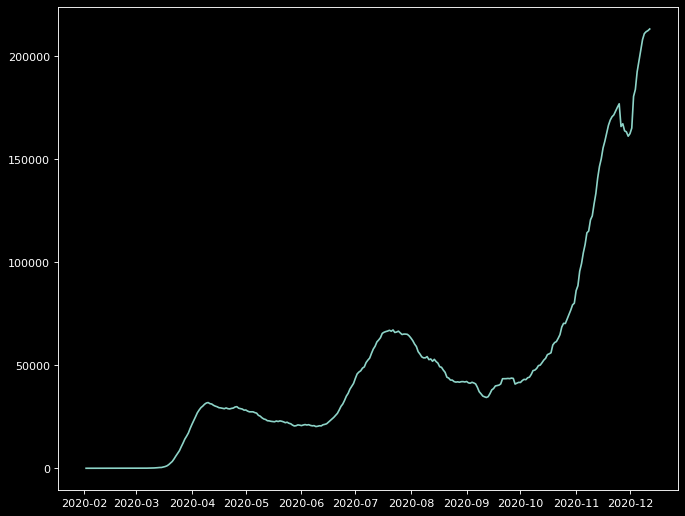

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 12/14/20


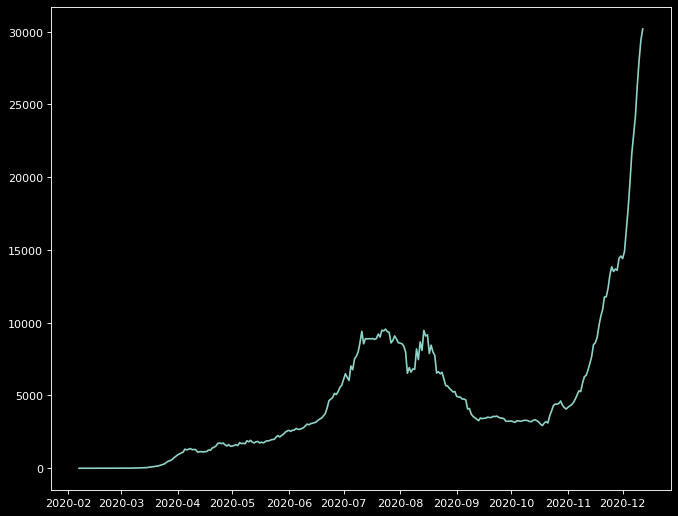

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 12/14/20


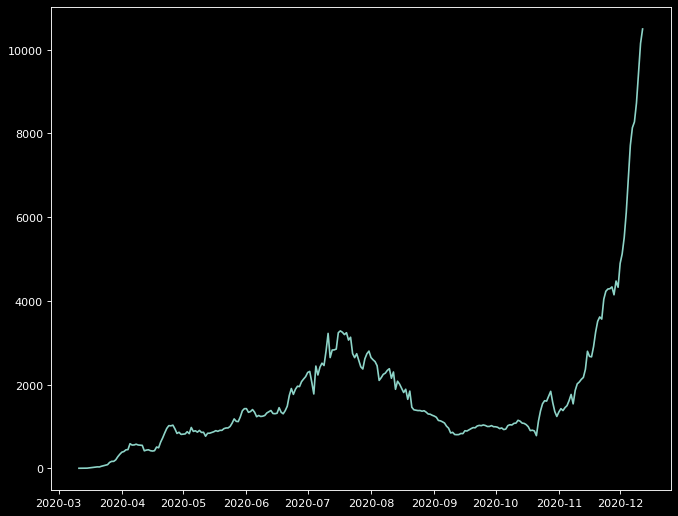

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()